# ENSEMBLE MODEL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import pickle

C:\Users\SATYAKI\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SATYAKI\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\SATYAKI\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train=pd.read_csv('Phising_Training_Dataset.csv')
train['Abnormal_URL'].value_counts()

 1    7622
-1    1333
Name: Abnormal_URL, dtype: int64

In [3]:
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
train.drop('key', axis = 1, inplace = True)

In [5]:
train.columns

Index(['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

 1    5034
-1    3921
Name: Result, dtype: int64


C:\Users\SATYAKI\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

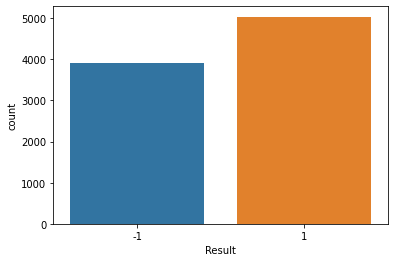

In [6]:
# EDA
print(train['Result'].value_counts())
sns.countplot(train['Result'])

<AxesSubplot:>

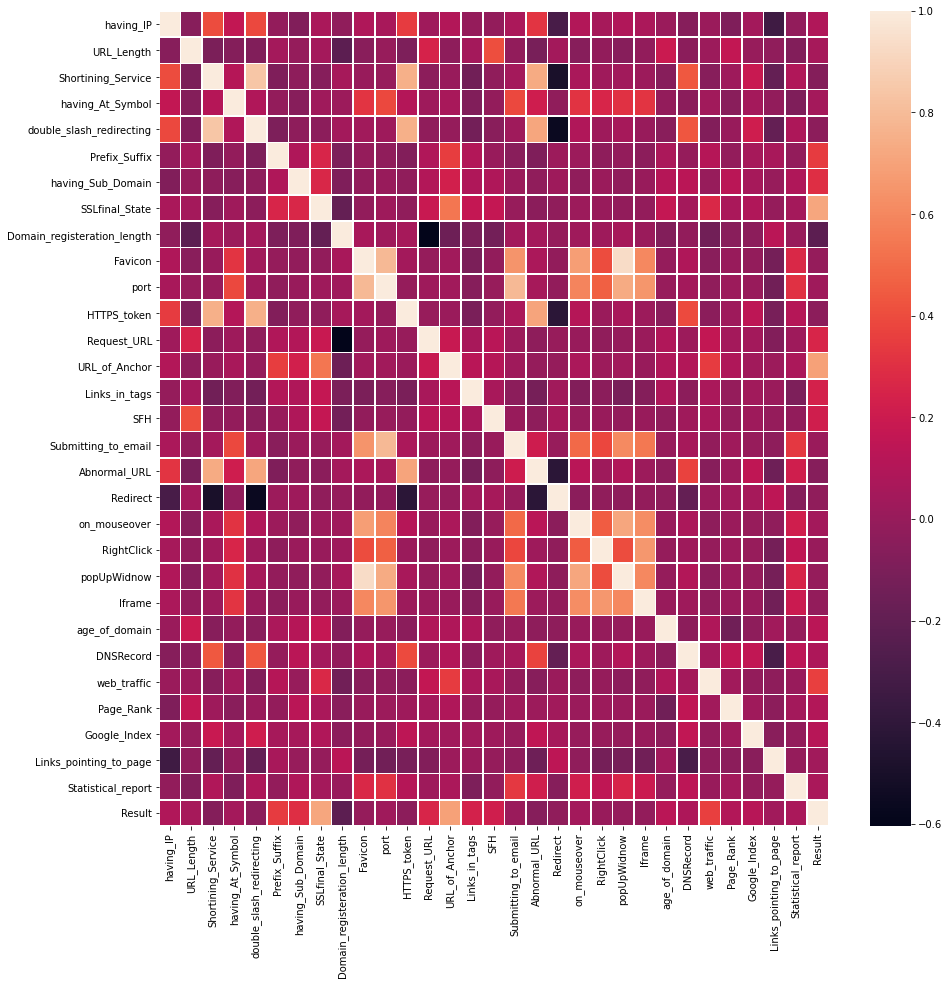

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), linewidths=.5)

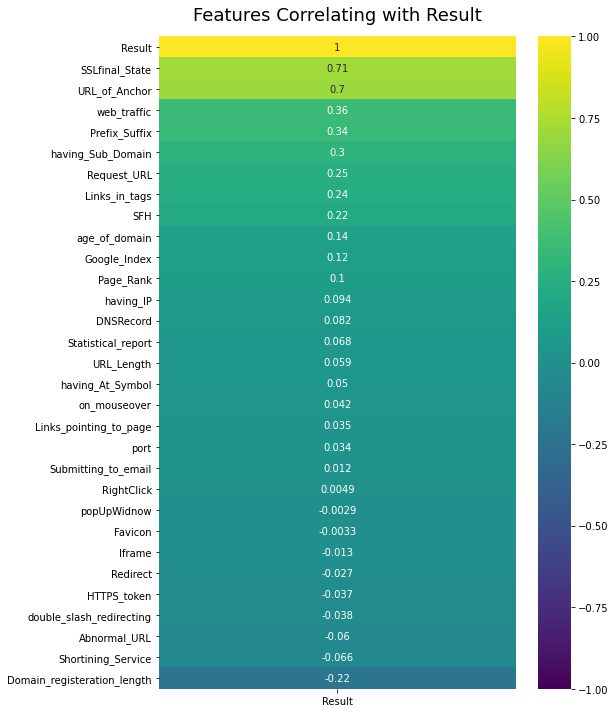

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
#plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

# **Ensembling Model**

In [9]:
#Splitting Data
X = train.drop('Result', axis = 1)
y = train['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Cross Validate Models
We will compare 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

* SVC
* Decision Tree
* AdaBoost
* XGBoost
* Random Forest
* Extra Trees
* Multiple layer perceprton (neural network)
* KNN
* Logistic regression
* Linear Discriminant Analysis

In [10]:
kfold = StratifiedKFold(n_splits=10)

In [11]:
random_state = 42

classifiers = []

classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

In [12]:
cv_res.sort_values(by = 'CrossValMeans', ascending = False)
# from the following we'll choose RandomForest, ExtraTrees, NN, AdaBoost and decusion trees as our classifiers.

,CrossValMeans,CrossValerrors,Algorithm
3,0.964827,0.008771,RandomForest
4,0.964327,0.007118,ExtraTrees
6,0.958826,0.009072,MultipleLayerPerceptron
2,0.955159,0.007509,AdaBoost
1,0.948826,0.007525,DecisionTree
5,0.946823,0.010718,GradientBoosting
0,0.942155,0.009087,SVC
7,0.928987,0.013071,KNeighboors
8,0.924987,0.008131,LogisticRegression
9,0.920485,0.009767,LinearDiscriminantAnalysis


In [13]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {
              "max_features": [3, 10, 20],
              "n_estimators" :[100,300, 500],
              "criterion": ["gini", "entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


0.965494713411241

In [14]:
gsRFC.best_params_

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 100}

In [15]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "n_estimators" :[100,300, 400],
              "criterion": ["gini", "entropy"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.9664938786866999

In [16]:
gsExtC.best_params_

{'criterion': 'gini',
 'max_features': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [17]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 50, 100, 150],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_
print(gsadaDTC.best_score_)

Fitting 10 folds for each of 224 candidates, totalling 2240 fits
0.9634941569282137


In [38]:
print(gsadaDTC.best_score_)

0.9634941569282137


In [18]:
gsadaDTC.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'random',
 'learning_rate': 0.2,
 'n_estimators': 150}

In [19]:
# # Multilayer Neural Network
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(300,200,100), (200,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

C:\Users\SATYAKI\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(300, 200, 100),
                                                (200, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [20]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (300, 200, 100),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [21]:
clf.best_score_

0.9599944398109536

In [22]:
nn_best = clf.best_estimator_

In [23]:
# Decision Tree
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : range(1,50),
              'min_samples_split': range(2,15),
              'min_samples_leaf': range(1,10),
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

Fitting 5 folds for each of 34398 candidates, totalling 171990 fits
{'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9436584653878232


In [37]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9436584653878232


## Plotting Learning Curves

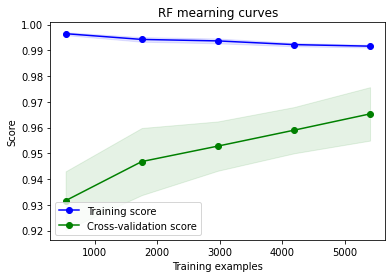

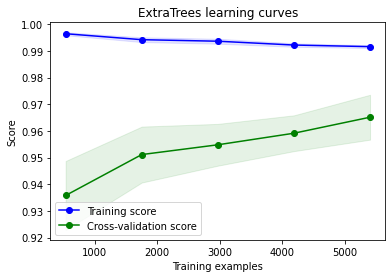

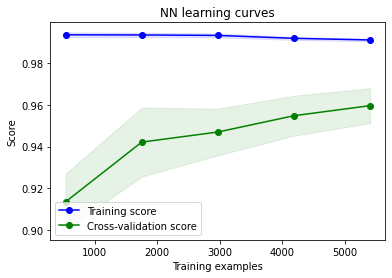

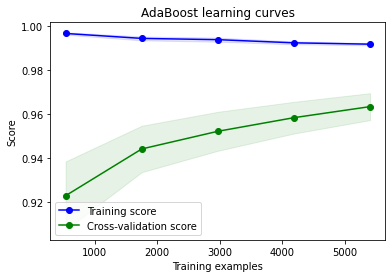

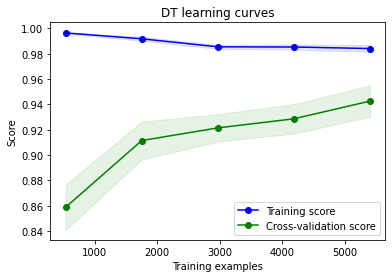

In [24]:
def plot_learning_curve(estimator, title, X, y, save, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(save, dpi=300, bbox_inches='tight')
    return plt

g1 = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold, save = 'RFLearningPlot')
g2 = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold, save = 'ETLearningPlot')
g3 = plot_learning_curve(nn_best,"NN learning curves",X_train,y_train,cv=kfold, save = 'NNLearningPlot')
g4 = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold, save = 'AdaLearningPlot')
g5 = plot_learning_curve(dt_best,"DT learning curves",X_train,y_train,cv=kfold, save = 'DTLearningPlot')

## Voting Classifier

In [25]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('nn', nn_best), ('adac',ada_best),('dt',dt_best)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_train, y_train)
y_pred = votingC.predict(X_test)

pickle.dump(votingC, open('model.sav', 'wb'))

In [26]:
# to read the model later
votingC = pickle.load(open('model.sav', 'rb'))
res = votingC.score(X_test, y_test)
res

0.9702300405953992

In [27]:
from sklearn.metrics import accuracy_score
y_pred = votingC.predict(X_test)
accuracy_score(y_test, y_pred)

0.9702300405953992

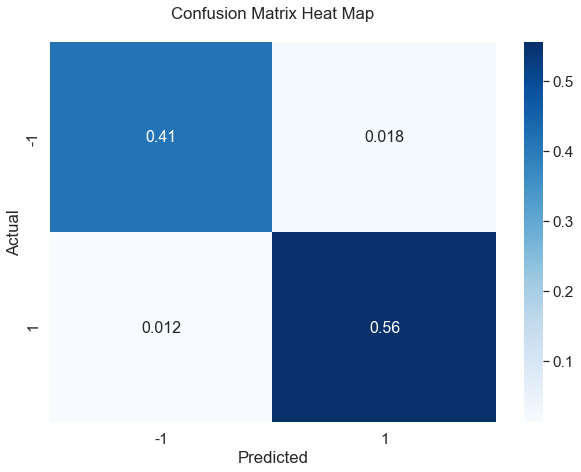

In [28]:
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix', dpi=300, bbox_inches='tight')

In [29]:
print(f'{votingC} Training Score: {votingC.score(X_train, y_train)}')
print(f'{votingC} Testing Score: {votingC.score(X_test, y_test)}')
print()
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=10)),
                             ('extc',
                              ExtraTreesClassifier(max_features=3,
                                                   min_samples_split=3,
                                                   n_estimators=300)),
                             ('nn',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(300, 200, 100),
                                            learning_rate='adaptive',
                                            max_iter=100)),
                             ('adac',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       splitter='random'),
       

In [30]:
target_names = ['Phishing', 'Legitamite']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.97      0.96      0.97      1276
  Legitamite       0.97      0.98      0.97      1680

    accuracy                           0.97      2956
   macro avg       0.97      0.97      0.97      2956
weighted avg       0.97      0.97      0.97      2956



In [31]:
test=pd.read_csv('Phising_Testing_Dataset.csv')
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(0)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,23433,-1,-1,-1,1,-1,-1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
2096,23434,1,1,1,-1,1,-1,1,1,-1,...,1,-1,1,-1,1,-1,1,1,1,1
2097,23435,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,1,0,1
2098,23436,1,-1,1,-1,1,-1,0,-1,-1,...,1,-1,-1,1,1,-1,-1,1,1,1


In [32]:
test.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [33]:
index = list(test['key'])

features_test = test.drop(columns=['key'])

y_pred = votingC.predict(features_test)
print(y_pred)

[ 1 -1 -1 ... -1  1  1]


In [34]:
print(len(y_pred))

2100


In [35]:
print(len(index))

2100


In [36]:
df = pd.DataFrame(list(zip(index, y_pred)),columns =['key', 'Result'])
# saving the dataframe
df.to_csv(r'submission.csv', index=False)